In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
from keras.applications.vgg16 import VGG16 # Import the network
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras import Model
vgg_feature_model = VGG16(weights='imagenet') # load the
# network with weights trained on imagenet

# Below we will print out the layer types of the network and
# examine 

for layer in vgg_feature_model.layers:
    print(layer.name) 

/home/annika/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [6]:
print(vgg_feature_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
feature_extractor = Model(inputs=vgg_feature_model.input, \   #extract features from flatten
                          outputs=\
                          vgg_feature_model.get_layer('block5_pool').output)  

In [8]:
#load images
training_path = "/home/annika/Computational_Biology_Second_Bit/Assignment3/notebooks/Kather_2016_images/Training"

validation_path ="/home/annika/Computational_Biology_Second_Bit/Assignment3/notebooks/Kather_2016_images/Validation"

batch_size = 200

# Below using convinience keras functions we will load the data
datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        training_path,  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary')

Found 4164 images belonging to 8 classes.
Found 836 images belonging to 8 classes.


In [ ]:
#extract features for one batch

X, target_label = train_generator.next()
X = preprocess_input(X) 
features_train = feature_extractor.predict(X)

features_train.shape  #over 25000 instances

In [8]:
#do PCA to reduce to 50
from sklearn.decomposition import PCA

pca_model = PCA(n_components=50)
X_transformed = pca_model.fit_transform(features_train)
X_transformed.shape

(200, 50)

In [9]:
#apply TSNE
from sklearn.manifold import TSNE  

tsne_model = TSNE()
X_transformed = tsne_model.fit_transform(X_transformed)
X_transformed.shape

(200, 2)

In [39]:
print(train_generator.class_indices)
cl = ["Tumor","Stroma","Complex","Lympho","Debris","Mucosa","Adipose","Empty"]

{'04_LYMPHO': 3, '01_TUMOR': 0, '06_MUCOSA': 5, '07_ADIPOSE': 6, '08_EMPTY': 7, '05_DEBRIS': 4, '02_STROMA': 1, '03_COMPLEX': 2}


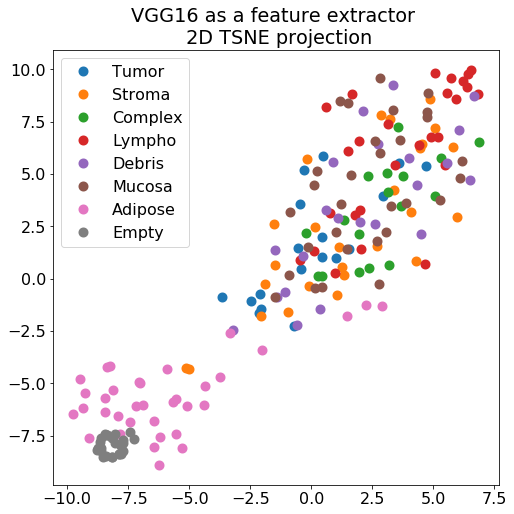

In [41]:
#plot
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 8))
labels = np.unique(target_label)
for label in labels:
    mask = target_label==label
    plt.plot(X_transformed[mask,0],X_transformed[mask,1],'.',label=cl[int(label)], mew=5, ms=10)
plt.legend()
plt.title("VGG16 as a feature extractor \n 2D TSNE projection")